## Payment Delays Analysis in Financial Services
1. Introduction

En el sector de servicios financieros, los retrasos en los pagos representan un riesgo directo para el flujo de efectivo, la gestión de crédito y la operación diaria.
Este proyecto tiene como objetivo analizar patrones de pagos tardíos a partir de un conjunto de datos simulado, con el fin de identificar comportamientos recurrentes y oportunidades de mejora en los procesos de cobranza.

2. Objective

El objetivo de este análisis es:

Identificar la proporción de pagos realizados fuera de tiempo.

Analizar si ciertos métodos de pago presentan mayores retrasos.

Detectar clientes con pagos tardíos recurrentes.

Proponer acciones operativas basadas en los hallazgos.

3. Dataset Description

El dataset utilizado en este proyecto es simulado y representa pagos realizados por clientes de una institución financiera.

Variables principales:

customer_id: Identificador único del cliente

payment_due_date: Fecha límite de pago

payment_date: Fecha real de pago

amount: Monto del pago

payment_method: Método de pago utilizado

Variables derivadas:

days_late: Número de días de retraso

late_payment: Indicador binario de pago tardío (0 = a tiempo, 1 = tardío)

4. Data Preparation

En esta sección se realiza:

Carga del dataset

Conversión de fechas al formato adecuado

Creación de variables derivadas

Revisión general de valores y estructura del dataset

5. Exploratory Data Analysis (EDA)
5.1 Overall Late Payment Rate

Análisis del porcentaje total de pagos tardíos en el dataset.

5.2 Late Payments by Payment Method

Comparación del comportamiento de retraso según el método de pago utilizado.

5.3 Customers with Recurrent Late Payments

Identificación de clientes que presentan pagos tardíos de manera frecuente.

6. Key Findings

Resumen de los principales hallazgos del análisis exploratorio, enfocados en patrones relevantes para la operación financiera.

7. Business Recommendations

A partir de los resultados obtenidos, se proponen acciones como:

Implementación de recordatorios automáticos de pago

Segmentación de clientes según comportamiento de pago

Ajustes en los métodos de pago con mayor tasa de retraso

8. Conclusion

Este análisis demuestra cómo, a partir de datos transaccionales básicos, es posible identificar patrones de riesgo y generar recomendaciones prácticas para mejorar la gestión de pagos en el sector financiero.

In [6]:
##importación
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
##Crear data set simulado
np.random.seed(42)

n_records = 300

data = {
    "customer_id": np.random.randint(1000, 1100, size=n_records),
    "payment_due_date": pd.to_datetime("2024-01-01") + pd.to_timedelta(
        np.random.randint(0, 60, size=n_records), unit="D"
    ),
    "payment_date": pd.to_datetime("2024-01-01") + pd.to_timedelta(
        np.random.randint(0, 70, size=n_records), unit="D"
    ),
    "amount": np.random.randint(200, 5000, size=n_records),
    "payment_method": np.random.choice(
        ["Credit Card", "Debit Card", "Bank Transfer"],
        size=n_records,
        p=[0.4, 0.35, 0.25]
    )
}

df = pd.DataFrame(data)

df.head()


,customer_id,payment_due_date,payment_date,amount,payment_method
0,1051,2024-01-16,2024-02-02,4780,Debit Card
1,1092,2024-01-03,2024-02-02,2275,Bank Transfer
2,1014,2024-01-20,2024-03-01,913,Bank Transfer
3,1071,2024-01-24,2024-02-20,1262,Debit Card
4,1060,2024-02-23,2024-02-12,2176,Bank Transfer


In [8]:
## Preparación de datos
# Calcular días de retraso
df["days_late"] = (df["payment_date"] - df["payment_due_date"]).dt.days

# Crear indicador de pago tardío
df["late_payment"] = df["days_late"].apply(lambda x: 1 if x > 0 else 0)

# Revisar estructura
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       300 non-null    int32         
 1   payment_due_date  300 non-null    datetime64[ns]
 2   payment_date      300 non-null    datetime64[ns]
 3   amount            300 non-null    int32         
 4   payment_method    300 non-null    object        
 5   days_late         300 non-null    int64         
 6   late_payment      300 non-null    int64         
dtypes: datetime64[ns](2), int32(2), int64(2), object(1)
memory usage: 14.2+ KB


In [9]:
##Exploratory Data Analysis (EDA)
##4.1 Porcentaje total de pagos tardíos
late_rate = df["late_payment"].mean() * 100
late_rate
print(f"Late payment rate: {late_rate:.2f}%")


Late payment rate: 51.00%


In [10]:
##4.2 Pagos tardíos por método de pago
late_by_method = (
    df.groupby("payment_method")["late_payment"]
    .mean()
    .reset_index()
)

late_by_method["late_payment"] = late_by_method["late_payment"] * 100
late_by_method


,payment_method,late_payment
0,Bank Transfer,51.807229
1,Credit Card,45.871560
2,Debit Card,55.555556


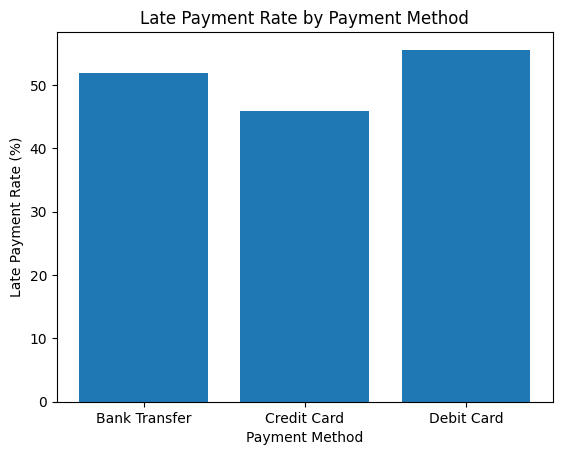

In [11]:
##Gráfico
plt.figure()
plt.bar(
    late_by_method["payment_method"],
    late_by_method["late_payment"]
)
plt.title("Late Payment Rate by Payment Method")
plt.ylabel("Late Payment Rate (%)")
plt.xlabel("Payment Method")
plt.show()


In [12]:
##Clientes con pagos tardíos recurrentes
late_by_customer = (
    df.groupby("customer_id")["late_payment"]
    .sum()
    .reset_index()
    .sort_values(by="late_payment", ascending=False)
)

late_by_customer.head(10)


,customer_id,late_payment
41,1043,5
58,1061,5
17,1018,4
13,1014,4
56,1059,4
48,1051,4
55,1058,4
0,1000,4
8,1008,3
47,1050,3


### Hallazgos clave
Se observa una proporción relevante de pagos realizados fuera de tiempo.

Algunos métodos de pago presentan una tasa de retraso mayor.

Un grupo reducido de clientes concentra múltiples pagos tardíos.

### Recomendaciones de negocio
Implementar recordatorios automáticos antes de la fecha de vencimiento.

Priorizar seguimiento a clientes con historial recurrente de atraso.

Evaluar mejoras en la experiencia de pago para métodos con mayor retraso.

In [13]:
df.describe(include="all")


,customer_id,payment_due_date,payment_date,amount,payment_method,days_late,late_payment
count,300.000000,300,300,300.000000,300,300.000000,300.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,Credit Card,NaN,NaN
freq,NaN,NaN,NaN,NaN,109,NaN,NaN
mean,1048.893333,2024-02-01 05:55:12,2024-02-03 09:36:00,2600.093333,NaN,2.153333,0.510000
min,1000.000000,2024-01-01 00:00:00,2024-01-01 00:00:00,203.000000,NaN,-55.000000,0.000000
25%,1022.750000,2024-01-20 00:00:00,2024-01-17 00:00:00,1517.000000,NaN,-15.000000,0.000000
50%,1051.000000,2024-02-01 12:00:00,2024-02-03 00:00:00,2586.500000,NaN,1.000000,1.000000
75%,1074.000000,2024-02-16 06:00:00,2024-02-21 00:00:00,3648.250000,NaN,21.000000,1.000000
max,1099.000000,2024-02-29 00:00:00,2024-03-10 00:00:00,4985.000000,NaN,66.000000,1.000000
